In [1]:
import statsmodels # http://www.statsmodels.org/devel/generated/statsmodels.nonparametric.kernel_density.KDEMultivariate.html
import statsmodels.api as sm

In [2]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [4]:
f = r.TFile("./data/gm2offline_ana_18398265_1544564276.1650.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :   424000 : Total =       252303494 bytes  File  Size =  109995864 *
*        :          : Tree compression factor =   2.29                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :   424000 : Total  Size=    1698163 bytes  File Size  =      10810 *
*Baskets :       18 : Basket Size=    1039360 bytes  Compression= 157.03     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :   424000 : Total  Size=    1698229 bytes  File Size  =      10822 *
*Baskets :       18 : Basket Size=    1039360 bytes  Compression= 156.86     *
*...............................................

423919


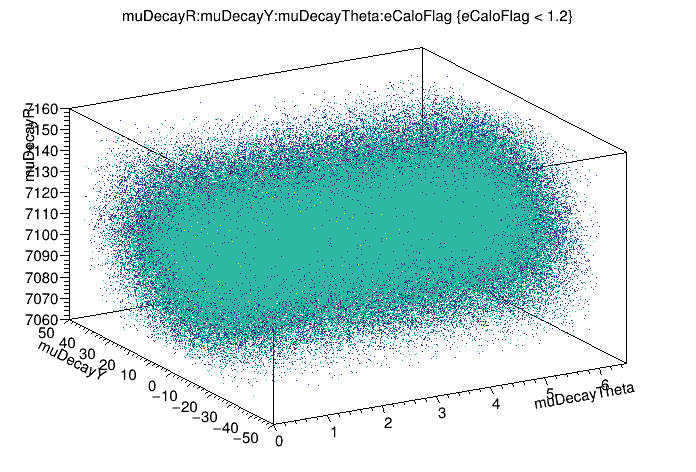

In [6]:
c = r.TCanvas()
nMu = t.Draw("muDecayR:muDecayY:muDecayTheta:eCaloFlag","eCaloFlag < 1.2","")
print(nMu)
c.Draw()

In [7]:
rawMuons = [[],[],[],[]]
for i in range(int(nMu/10)):
    rawMuons[0].append(t.GetV1()[i])
    rawMuons[1].append(t.GetV2()[i])
    rawMuons[2].append(t.GetV3()[i])
    rawMuons[3].append(t.GetV4()[i])

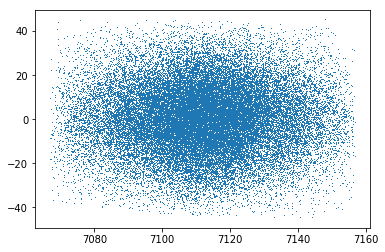

In [8]:
plt.plot(rawMuons[0],rawMuons[1],",")
plt.show()

---

### Now lets try a 1-D case

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
#mu=np.array([1,10,20])
#sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
#data=np.random.multivariate_normal(mu,sigma,1000)
#values = data.T
values = rawMuons[0:1]

kde = stats.gaussian_kde(values)
density = kde(values)

In [ ]:
pdf = kde.pdf(values)

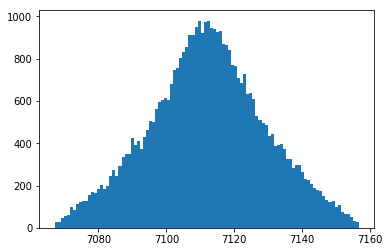

In [15]:
plt.hist(values[0],bins=100)
plt.show()

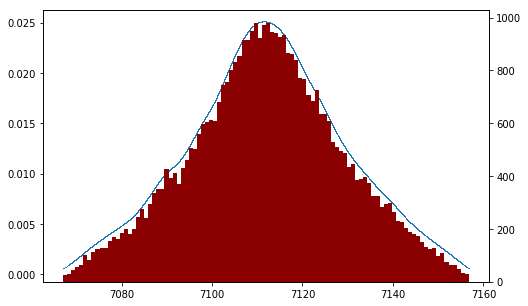

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(values[0],pdf,",")

ax2 = ax.twinx()
ax2.hist(values[0],color="darkred", bins=100)

plt.show()

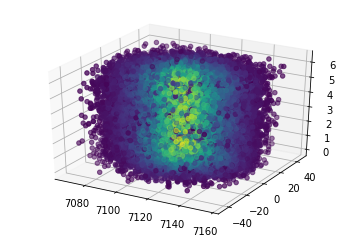

In [48]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

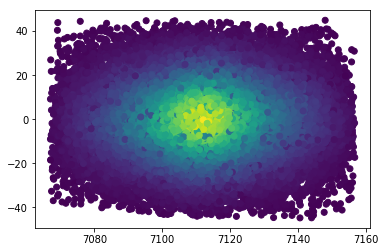

In [50]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=pdf)
plt.show()

In [37]:
X, Y = np.mgrid[7000:7200:100j, -45:45:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

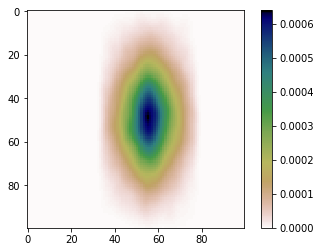

In [41]:
fig, ax = plt.subplots()
im = ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r)
plt.colorbar(im)
plt.show()